In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import linear_regression
from linear_regression import LinearRegression
from algorithms import *
import gurobipy as gp
from gurobipy import GRB
import scipy.linalg
import itertools
import algorithms
import postprocessing

## Load in Plant Data.

In [2]:
# read in the plant data.
plant_data = pd.read_csv('plant.csv')
plant_data.head()

,species,treatment,a.cs,h.c,h.t,a.lf,lf.sz,m.t,m.lf,d.st,lf.ma,a.cp
0,P. acuminata,HL,0.078809,0.106621,0.180508,0.024219,0.004036,NaN,NaN,0.46,22.838816,0.044725
1,P. acuminata,HL,0.214247,0.256257,0.330145,0.053589,0.005359,NaN,NaN,0.46,22.838816,0.080008
2,P. acuminata,HL,0.325962,0.423575,0.497462,0.106109,0.005305,NaN,NaN,0.46,22.838816,0.079614
3,P. acuminata,HL,0.350817,0.429183,0.504779,0.116577,0.004663,NaN,NaN,0.46,22.838816,0.094305
4,P. acuminata,HL,0.373981,0.349976,0.618716,0.120376,0.003883,0.01494,0.00275,0.46,22.838816,0.161536


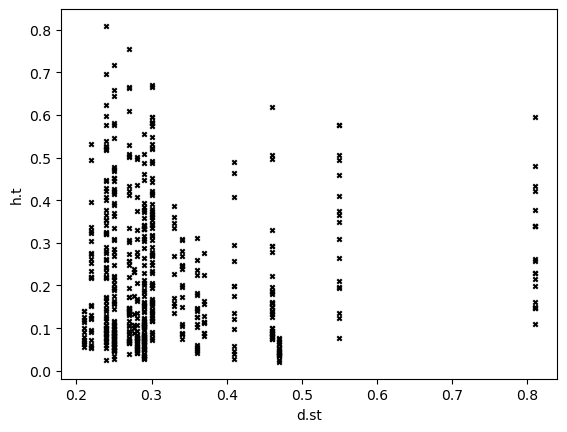

In [3]:
# create a scatter plot of d.st vs. h.t
plt.scatter(plant_data['d.st'], plant_data['h.t'], s=10, c='black', marker='x')
plt.xlabel('d.st')
plt.ylabel('h.t')
plt.show()

In [4]:
2/559

0.0035778175313059034

In [5]:
# retrieve all x values that that are in mis_inds.
mis_inds = [49, 50]
mis_df = plant_data.iloc[mis_inds]
# retrieve the x values.
mis_x = mis_df['d.st'].to_numpy()
# retrieve the y values.
mis_y = mis_df['h.t'].to_numpy()

# retrieve the x values that are not in mis_inds.
not_mis_df = plant_data.drop(mis_inds)
# retrieve the x values.
not_mis_x = not_mis_df['d.st'].to_numpy()
# retrieve the y values.
not_mis_y = not_mis_df['h.t'].to_numpy()

In [6]:
# fit a linear regression on full data.
x = plant_data['d.st'].to_numpy()
y = plant_data['h.t'].to_numpy()
# reshape x to be a 2D array
x = x.reshape(-1, 1)
# Add an intercept term.
df = pd.DataFrame(x)
df.insert(0, 'Ones', 1)
arr = df.values
x = arr

In [7]:
# fit the model
lr = LinearRegression(x=x.T, y=y)
lr.fit()
print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
) 

Estimated beta1 with full dataset: 0.024938564537479217


In [8]:
x_clean = not_mis_df['d.st'].to_numpy()
y_clean = not_mis_df['h.t'].to_numpy()
# reshape x to be a 2D array
x_clean = x_clean.reshape(-1, 1)
# Add an intercept term.
df_clean = pd.DataFrame(x_clean)
df_clean.insert(0, 'Ones', 1)
arr_clean = df_clean.values
x_clean = arr_clean

In [9]:
# fit the model
modified_lr = LinearRegression(x=x_clean.T, y=y_clean)
modified_lr.fit()
print(
    f"Estimated beta1 with full dataset: {modified_lr.beta[1]}"
) 

Estimated beta1 with full dataset: -0.014138618589854709


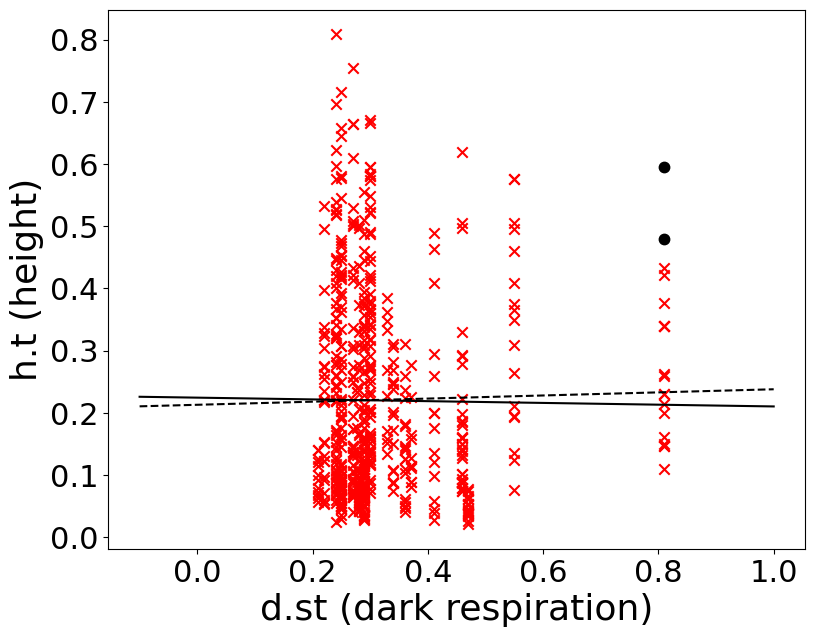

In [ ]:
### create scatter plot.
plt.figure(figsize=(9, 7))

plt.scatter(not_mis_x, not_mis_y, marker='x', color='red', s=56)
plt.scatter(mis_x, mis_y, marker='o', color='black', label='dropped points', s=56)

x_values = np.linspace(-0.1, 1, 100)
y_values_full = lr.beta[1] * x_values + lr.beta[0]
y_value_red_crosses = modified_lr.beta[1] * x_values + modified_lr.beta[0]
plt.plot(x_values, y_values_full, color='black', linestyle='--', label='full data') 
plt.plot(x_values, y_value_red_crosses, color='black', linestyle='-', label='after dropping points')

plt.xlabel('d.st (dark respiration)', fontsize=26) 
plt.ylabel('h.t (height)', fontsize=26)

# plt.ylim(-5, 10)
# plt.xlim(-5, 10)

plt.xticks(fontsize=22) 
plt.yticks(fontsize=22)
# plt.legend(fontsize=16)
# plt.savefig('fig/plants_scatter.pdf')
plt.show()

## Net Approx. Algorithm

In [11]:
Xnet = np.zeros((x.shape[0],x.shape[1]))
Xnet[:,0] =  x[:,1]
Xnet[:,1] =  x[:,0]

In [12]:
n_sumwstar, wstar = algorithms.net_algorithm(Xnet,y,1000)

Set parameter Username
Set parameter LicenseID to value 2617160
Academic license - for non-commercial use only - expires 2026-02-01


In [29]:
wstar

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.88338477,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [13]:
print(f"Number of points needed to be removed to zero-out the OLS solution: {n_sumwstar}")
# find the indice of wstar that are non-one.
mis_inds = np.where(wstar != 1)[0] # round down.
mis_inds

Number of points needed to be removed to zero-out the OLS solution: 1.4028641862851146


array([ 49,  50, 382])

In [14]:
len(mis_inds)

3

In [15]:
inds = mis_inds
new_x= np.delete(x, inds, axis=0)
new_y= np.delete(y, inds, axis=0)
print(new_x.shape)
print(new_y.shape)

lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr_na = LinearRegression(x=new_x.T, y=new_y)
modified_lr_na.fit()
print(
    f"Estimated beta1 after removing subset: {modified_lr_na.beta[1]}"
)

(556, 2)
(556,)
Estimated beta1 with full dataset: 0.024938564537479217
Estimated beta1 after removing subset: -0.01624064149280385


## Gurobi [FH23]

In [17]:
model_objbound_frac, model_objval_frac, weights_frac, model_frac = solve_regression_fractional(x, y, intercept=True,time_limit=30, warm_start=None, verbose=True,
                               greater_one_constraint=False, pairs=None)
weights_from_fractional_gurobi = np.array([w.X for w in weights_frac])

set residual constraints
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
start solving
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 21.6.0 21H1320)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  30
NonConvex  2

Optimize a model with 1118 rows, 561 columns and 1118 nonzeros
Model fingerprint: 0xe1abd4ed
Model has 3 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-01, 1e+00]
  QLMatrix range   [6e-03, 8e-01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1118 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Found heuristic solution: objective -0.0000000
Presolve removed 1118 rows and 0 columns
Presolve time: 0.00s
Presolved: 4474 rows, 1680 columns, 12298 nonzeros
Presolved model has 1118 bilinear cons

In [18]:
model_objbound, model_objval, weights, model =solve_regression_integral(x, y, intercept=True, time_limit=30, warm_start=weights_from_fractional_gurobi, verbose=True, #beta_sign=1,
                                warm_start_ub=None, pairs = None)
integer_weights = np.array([w.X for w in weights])

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 21.6.0 21H1320)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  30
NonConvex  2

Optimize a model with 1 rows, 562 columns and 1 nonzeros
Model fingerprint: 0xefe37633
Model has 3 quadratic constraints
Variable types: 3 continuous, 559 integer (559 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [4e-02, 1e+00]
  QLMatrix range   [6e-03, 8e-01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]

User MIP start produced solution with objective 557 (0.01s)
Loaded user MIP start with objective 557

Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 3356 rows, 5593 columns, 12857 nonzeros
Presolved model has 3354 SOS constraint(s)
Variable types: 3357 conti

In [19]:
# select the indices of the points with weight 0.
indices_to_remove = np.where(integer_weights == 0)[0]
indices_to_remove, len(indices_to_remove)

(array([49, 50]), 2)

#### Refit after Removing Flagged Points.

In [20]:
inds = indices_to_remove
new_x= np.delete(x, inds, axis=0)
new_y= np.delete(y, inds, axis=0)
print(new_x.shape)
print(new_y.shape)

lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr_na = LinearRegression(x=new_x.T, y=new_y)
modified_lr_na.fit()
print(
    f"Estimated beta1 after removing subset: {modified_lr_na.beta[1]}"
)

(557, 2)
(557,)
Estimated beta1 with full dataset: 0.024938564537479217
Estimated beta1 after removing subset: -0.014138618589854709


## Gurobi (no warm start)

In [53]:
model_objbound, model_objval, weights, model = solve_regression_integral(x,y, intercept=True,time_limit=30, warm_start=None, verbose=True, #beta_sign=1,
                            warm_start_ub=None, pairs = None)

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 21.6.0 21H1320)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  30
NonConvex  2

Optimize a model with 1 rows, 562 columns and 1 nonzeros
Model fingerprint: 0xd2dc828d
Model has 3 quadratic constraints
Variable types: 3 continuous, 559 integer (559 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [4e-02, 1e+00]
  QLMatrix range   [6e-03, 8e-01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 3356 rows, 5593 columns, 12857 nonzeros
Presolved model has 3354 SOS constraint(s)
Variable types: 3357 continuous, 2236 integer (2236 binary)

Root relaxation: obje

In [54]:
weights_array = np.array([w.X for w in weights])

In [55]:
# select the indices of the points with weight 0.
indices_to_remove = np.where(weights_array == 0)[0]
indices_to_remove

array([48, 49])

In [56]:
inds = indices_to_remove
new_x= np.delete(x, inds, axis=0)
new_y= np.delete(y, inds, axis=0)
print(new_x.shape)
print(new_y.shape)

lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr_na = LinearRegression(x=new_x.T, y=new_y)
modified_lr_na.fit()
print(
    f"Estimated beta1 after removing subset: {modified_lr_na.beta[1]}"
)

(557, 2)
(557,)
Estimated beta1 with full dataset: 0.024938564537479217
Estimated beta1 after removing subset: -0.003773880753708774


#### Refit after Removing Flagged Points.

In [92]:
Gurobi_inds= indices_to_remove
new_x= np.delete(x, Gurobi_inds, axis=0)
new_y= np.delete(y, Gurobi_inds, axis=0)
print(new_x.shape)
print(new_y.shape)

(91, 2)
(91,)


In [ ]:
# Refit after removing the points specified by NetApprox (these indices are the same).
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr_na = LinearRegression(x=new_x.T, y=new_y)
modified_lr_na.fit()
print(
    f"Estimated beta1 after removing subset specified by gurobi: {modified_lr_na.beta[1]}"
)

Estimated beta1 with full dataset: 0.17616263306698832
Estimated beta1 after removing subset specified by NetApprox: -0.00407266794802038


## Additive and Greedy algorithms.

In [22]:
plants_df = postprocessing.compute_scores(x, y, lr, True)
plants_df

,x,y,residual,leverage,IF,1Exact,sorted_IF_indices,sorted_1Exact_indices,sorted_IF_scores,sorted_1Exact_scores
0,1.0,0.180508,-0.043756,0.004103,0.000740,0.000743,50,50,-0.021771,-0.022469
1,1.0,0.330145,0.105880,0.004103,-0.001792,-0.001799,49,49,-0.014876,-0.015353
2,1.0,0.497462,0.273198,0.004103,-0.004623,-0.004642,48,48,-0.012051,-0.012437
3,1.0,0.504779,0.280515,0.004103,-0.004747,-0.004766,43,43,-0.011357,-0.011722
4,1.0,0.618716,0.394452,0.004103,-0.006675,-0.006702,120,121,-0.009810,-0.009891
...,...,...,...,...,...,...,...,...,...,...
554,1.0,0.049629,-0.169399,0.002452,-0.001534,-0.001538,37,37,0.005035,0.005197
555,1.0,0.064119,-0.154908,0.002452,-0.001403,-0.001407,44,44,0.005193,0.005360
556,1.0,0.093097,-0.125931,0.002452,-0.001141,-0.001144,45,45,0.005194,0.005361
557,1.0,0.105559,-0.113468,0.002452,-0.001028,-0.001030,247,247,0.006072,0.006088


In [24]:
print(f'The AMIP approximation of the refit is {round(lr.beta[1] + sum(plants_df["sorted_IF_scores"][:2]), 4)}.')
print(f'The Add-1Exact of refit is {round(lr.beta[1] + sum(plants_df["sorted_1Exact_scores"][:2]), 4)}.')

The AMIP approximation of the refit is -0.0117.
The Add-1Exact of refit is -0.0129.


#### Greedy Algorithms.

In [80]:
# store the original x and y.
orig_x = x
orig_y = y

# compute scores for initial round of the greedy algorithm.
orig_df, if_inds, if_scores, newton_inds, newton_scores = create_orig_df(orig_x, orig_y, lr)

orig_inds_if = if_inds
orig_inds_newton = newton_inds
# compute influence scores.
if_scores = -lr.influence_scores()[1]
# sort indices in ascending order.
if_inds = np.argsort(if_scores)
print("inds", if_inds[:10])
newton_inds = np.argsort(newton_scores)
print("newton_inds", newton_inds[:10])

# reset greedy loop.
x = orig_x
y = orig_y

inds [ 50  49  48  43 120 121  42 110 119   4]
newton_inds [ 50  49  48  43 121 120  42 110 119   4]


In [86]:
from approximations import Run_Greedy

In [87]:
# run greedy
dropped_order, exact_changes_beta, beta_estimates_greedy = Run_Greedy(orig_x, orig_y, orig_inds_if, orig_inds_newton, lr, method='IF')

print("dropped order: \n", dropped_order[:15])
print("exact (greedy) beta estimates: \n", beta_estimates_greedy[:15])

iteration 0
index to remove (original): 50
fitted beta1: 0.0024691478935827647
iteration 1
index to remove (original): 49
fitted beta1: -0.014138618589854709
iteration 2
index to remove (original): 48
fitted beta1: -0.02876985646654459
iteration 3
index to remove (original): 43
fitted beta1: -0.043648771016864915
iteration 4
index to remove (original): 42
fitted beta1: -0.056406446990370826
iteration 5
index to remove (original): 121
fitted beta1: -0.0689629963150842
iteration 6
index to remove (original): 120
fitted beta1: -0.08176440952590687
iteration 7
index to remove (original): 40
fitted beta1: -0.09401520386791272
iteration 8
index to remove (original): 41
fitted beta1: -0.10725969002797348
iteration 9
index to remove (original): 47
fitted beta1: -0.12159387992269705
iteration 10
index to remove (original): 110
fitted beta1: -0.13403977956111962
iteration 11
index to remove (original): 119
fitted beta1: -0.1463462316257423
iteration 12
index to remove (original): 109
fitted beta